In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm

#First we are going to see what's going on with the data:

In [4]:
data = pd.read_csv('all_data.csv')

In [288]:
print(data.head())
print(data.Country.unique())
print(data.dtypes)
print(data.shape)



  Country  Year  Life expectancy at birth (years)           GDP      GDP_1000
0   Chile  2000                              77.3  7.786093e+10  7.786093e+07
1   Chile  2001                              77.3  7.097992e+10  7.097992e+07
2   Chile  2002                              77.8  6.973681e+10  6.973681e+07
3   Chile  2003                              77.9  7.564346e+10  7.564346e+07
4   Chile  2004                              78.0  9.921039e+10  9.921039e+07
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
GDP_1000                            float64
dtype: object
(96, 5)


#We realice that there are a few variables, all of them are correct on data type. I suggest to change the name of the column: "Life expectancy at birth (years)", is too long and it could take you a wrong code in the future..., but I use copy/paste and i get assure that the calling column will not have an error.

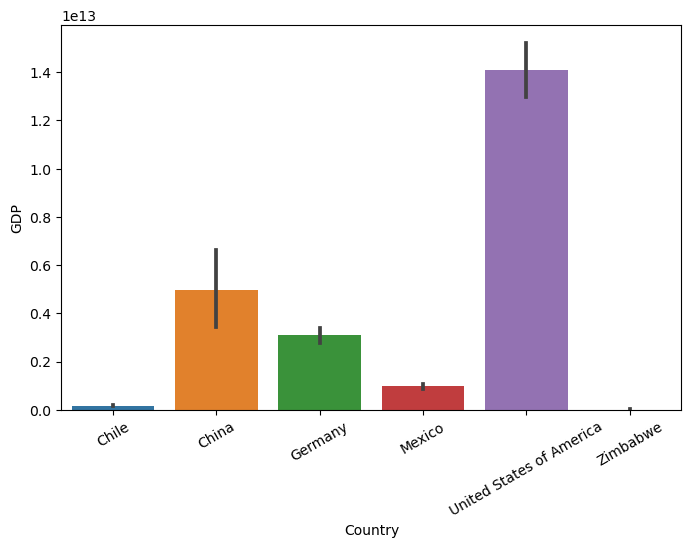

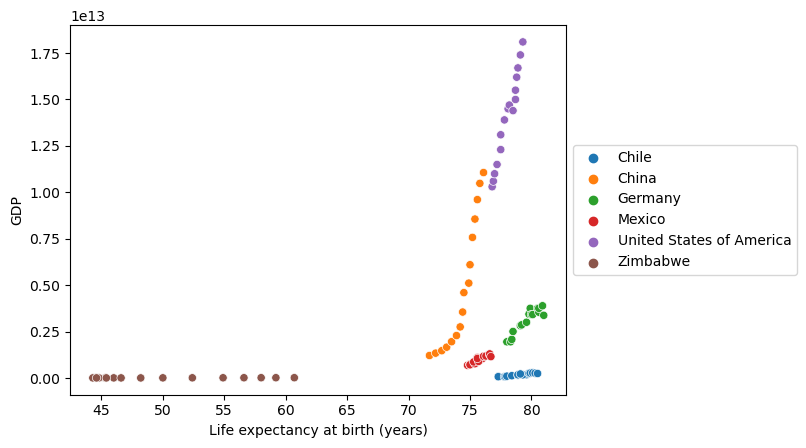

<Figure size 640x480 with 0 Axes>

In [287]:

plt.figure(figsize = (8, 5))
sns.barplot(x = 'Country', y = 'GDP', data = data)
plt.xticks(rotation = 30, fontsize = 10)
plt.show()
plt.clf()

sns.scatterplot(x = 'Life expectancy at birth (years)', y = 'GDP', data = data, hue = 'Country')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
plt.clf()

#on the grapichs above I print a figure with the different GDP that those countries had, is according to the richest country they are; according to the population and the culture, is two easy to understand that there is an increasing GDP with the life expentancy at birth in years; USA is on TOP! as we can imaging.

On the nex figure we get the beahior per country with the GDP vs life expentancy at birth; all of the country that we compare they have,more or less, the same trend on the curve, ascending as the year expentancy life increment, it has a strong correlance between them (GDP and expentation live on Years)

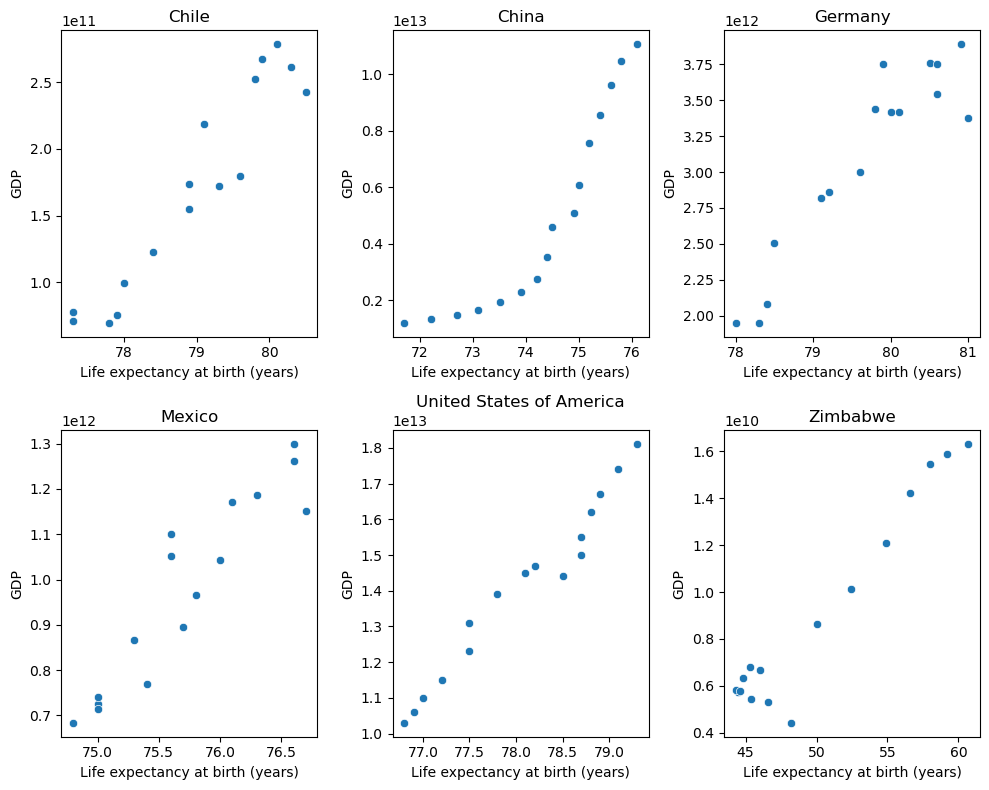

In [101]:
Countries = data.Country.unique()
plt.figure(figsize=(10, 8))
i = 1
for country in Countries:
    plt.subplot(2, 3, i)
    Country_X = data[data.Country == country]
    sns.scatterplot(x="Life expectancy at birth (years)", y="GDP", data=Country_X)
    plt.title(country)
    plt.xlabel("Life expectancy at birth (years)")
    plt.ylabel("GDP")
    i += 1

plt.tight_layout()
plt.show()


In [129]:
#df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
data_means_GDP = data.GDP.groupby(data.Country).mean()
data_means_Year = data["Life expectancy at birth (years)"].groupby(data.Country).mean()
data_means = pd.DataFrame({"Mean_GDP" :data_means_GDP, "Mean_Years" : data_means_Year})
data_means.reset_index(inplace = True)
print(data_means)


                    Country      Mean_GDP  Mean_Years
0                     Chile  1.697888e+11    78.94375
1                     China  4.957714e+12    74.26250
2                   Germany  3.094776e+12    79.65625
3                    Mexico  9.766506e+11    75.71875
4  United States of America  1.407500e+13    78.06250
5                  Zimbabwe  9.062580e+09    50.09375


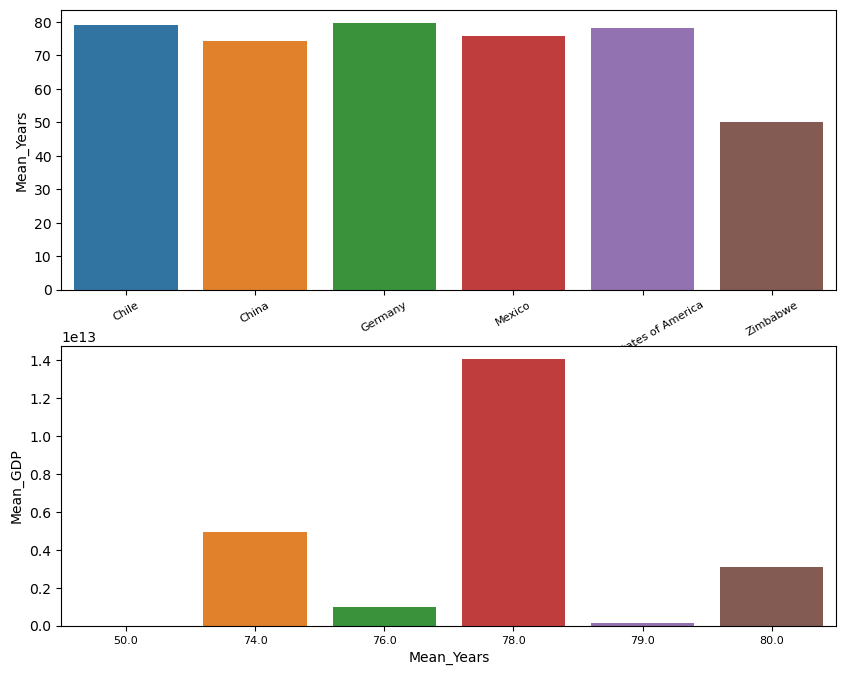

<Figure size 640x480 with 0 Axes>

In [291]:
plt.figure(figsize = (10,8))
plt.subplot(211)
sns.barplot(x = "Country", y = "Mean_Years", data = data_means, width = 0.8, dodge = True)
plt.xticks(rotation = 30, fontsize = 8)
plt.subplot(212)
sns.barplot(x = round(data_means.Mean_Years, 0), y = "Mean_GDP", data = data_means, width = 0.8, dodge = True)
plt.xticks(fontsize = 8)

plt.show()
plt.clf()

we can see how the Life expentancy at birth (years) is increasing on Zimbabwe country from each year, that has an obvious correlation with the GDP year'increase, it is very strong the positive line ascendingyo (you will be ablle to see it on a small graphic on the next figures GPDvsYear per country 


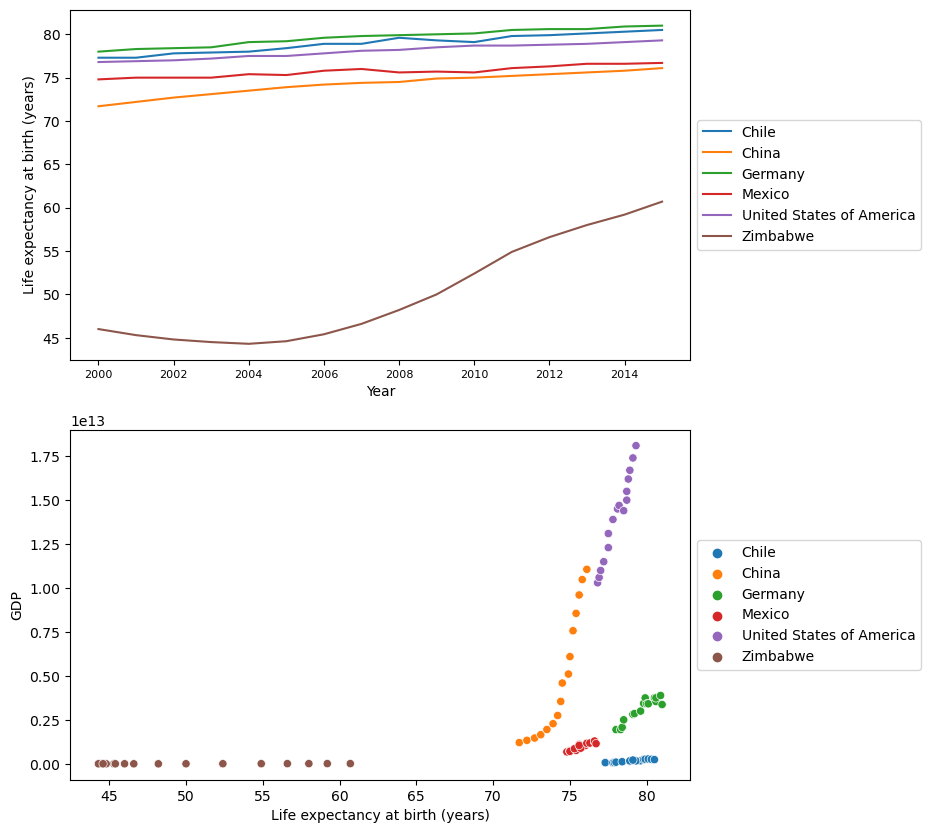

<Figure size 640x480 with 0 Axes>

In [295]:
plt.figure(figsize = (8,10))
plt.subplot(211)
sns.lineplot(x = "Year", y = "Life expectancy at birth (years)", data = data, hue = "Country")
plt.xticks(fontsize = 8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("we can see how the Life expentancy at birth (years) is increasing on Zimbabwe country from each year, that has an obvious correlation with the GDP year'increase, it is very strong the positive line ascendingyo (you will be ablle to see it on a small graphic on the next figures GPDvsYear per country ")
plt.subplot(212)
sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = data, hue = "Country" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.clf()


/Users/jsalgado/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


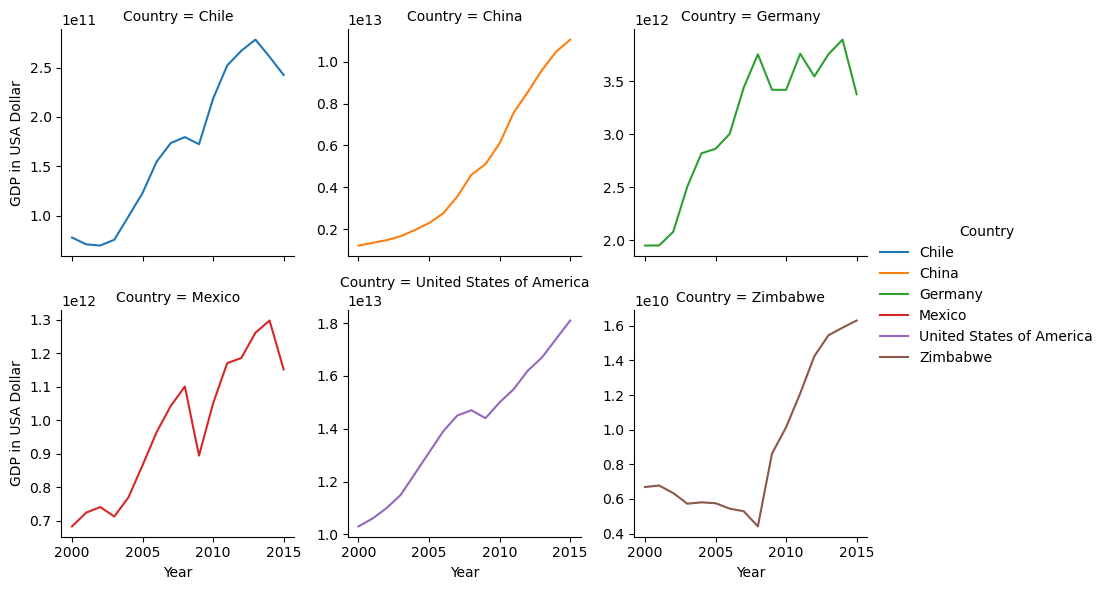

In [314]:


graph = sns.FacetGrid(data, col = "Country", col_wrap = 3, hue = "Country", sharey = False)
graph.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in USA Dollar")

#print(graph)

Text(0.5, 0, 'Life expectancy at birth (years)')

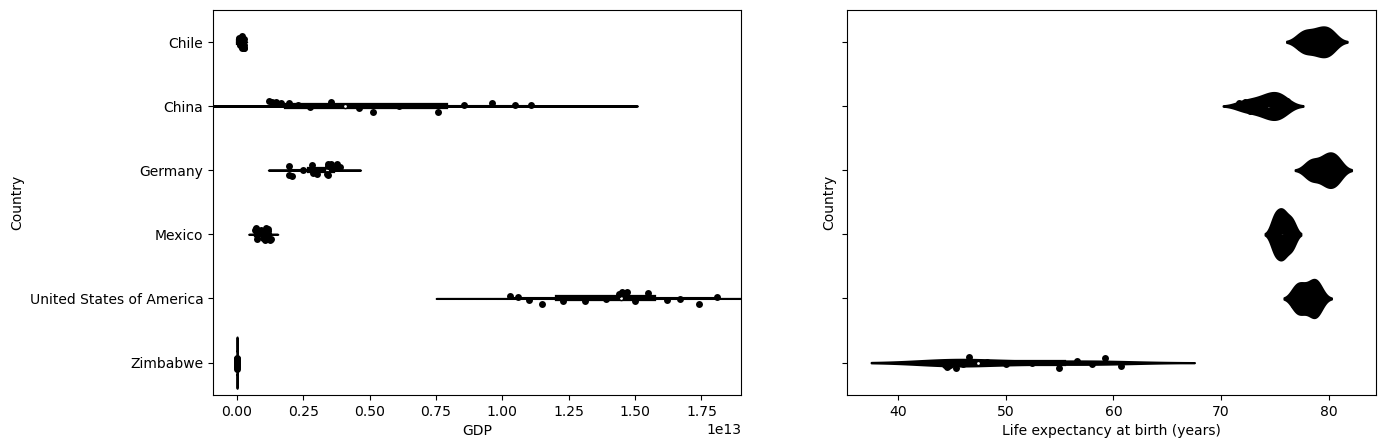

In [304]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15, 5))

axes[0] = sns.violinplot(ax = axes[0], x = "GDP", y = "Country", data = data, color = "black")
axes[0] = sns.stripplot(ax = axes[0], x = "GDP", y = "Country", data = data, color = "black")
plt.xlabel("GDP in USD Dollar")
axes[1] = sns.violinplot(ax = axes[1], x = "Life expectancy at birth (years)", y = "Country", data = data, color = "black")
axes[1] = sns.stripplot(ax = axes[1], x = "Life expectancy at birth (years)", y = "Country", data = data, color = "black")
plt.xlabel("Life expectancy at birth (years)")


In [303]:
#On #the graph above, it easy to visualice who the LIfe expectancy at birth is similiar on every country except Zimbabwe